In [95]:
grid = get(load("../1.Upscaling/upscaling_ba/ba_grid_4.Rdata"))
grid_fba = get(load("../1.Upscaling/upscaling_fba/ fba_grid_4.Rdata"))

In [59]:
source("../2.Fire_Seasson/Funciones_FS.r")

In [60]:
##Hacemos la media de todos los eneros, de todos los febreros,... de todos los meses para cada gridBox:
df.seriesTemporales <- func.ToDataFrame(grid = grid, coordX = grid$xyCoords$x, coordY = grid$xyCoords$y, func = mean)
## incluimos las coordenadas en el data frame de series temporales pero creando otro objeto. Esto lo hago para evitar problemas de programación cuando calcule la fire seasson
coordenadas = getCoordsFromDataFrame(df.seriesTemporales)
coord_x = coordenadas$x
coord_y = coordenadas$y
df.coords = data.frame(coord_x, coord_y)

100.00% de func.ToDataFrame completado

In [61]:
df.seriesTemporales_conCoords <- as.data.frame(cbind(df.coords, df.seriesTemporales))


#####Calculamos la Fire SEasson usando las series temporales (las medias de cada mes)
df.fireSeasson <- data.frame(t(data.frame(t(apply(df.seriesTemporales, 1, func.fireSeasson)))))
names(df.fireSeasson)[ncol(df.fireSeasson)] <- 'FireSeasson'
rownames(df.fireSeasson) <- NULL

##Calculamos las bimodales y lo incluimos en el data frame de la fire seasson
df.fireSeasson <- func.bimodalidad(df.seriesTemporales_conCoords, df.fireSeasson)


##Calculamos la Seassonal Concentration y el Seassonal Timing y los incluimos en el data frame de la fire seasson
vector_c <- c()
vector_p <- c()
for (i in 1:nrow(df.seriesTemporales)){
    carFS <- func.caracterizacion_fireSeason(unlist(df.seriesTemporales[i,]))
    if (is.na(carFS[1])){
        vector_c <- c(vector_c, 0)
        vector_p <- c(vector_p, 0)
    }else{
        C = carFS$C
        P = carFS$P
        vector_c <- c(vector_c, C)
        vector_p <- c(vector_p, P)  
    }
}

df.fireSeasson <- cbind(df.fireSeasson,vector_c)
names(df.fireSeasson)[ncol(df.fireSeasson)] <- 'SeassonalConcentration'
df.fireSeasson <- cbind(df.fireSeasson,vector_p)
names(df.fireSeasson)[ncol(df.fireSeasson)] <- 'SeassonalTiming'

#Guardamos el data frame de las fires seassons antes de añadirle las coordeandas
#save(df.fireSeasson, file = '../3.Datos generados/datos/dfFireSeasson.Rdata')

nrow(df.fireSeasson)

[1] 4050

### Fire Season

Si hay incendios durante todo el año no hay fire seasson

In [62]:
conFireSeasson <- nrow(df.fireSeasson[!is.na(df.fireSeasson$FireSeasson), ])
sinFireSeasson <- nrow(df.fireSeasson[is.na(df.fireSeasson$FireSeasson), ])


cat('Total de gridBoxes = ',nrow(df.fireSeasson),
'\nGridboxes con fire seasson = ',conFireSeasson, '(',conFireSeasson/nrow(df.fireSeasson)*100,'%)',
'\nGridboxes sin fire seasson = ',sinFireSeasson, '(',sinFireSeasson/nrow(df.fireSeasson)*100,'%)')

Total de gridBoxes =  4050 
Gridboxes con fire seasson =  1166 ( 28.79012 %) 
Gridboxes sin fire seasson =  2884 ( 71.20988 %)

Podemos mostrar, a modo de ejemplo, los gridBoxes que  sí que tienen Fire Seasson

In [63]:
df.fireSeasson[!is.na(df.fireSeasson$FireSeasson), ][1:10,]

,coord_x,coord_y,FireSeasson,Bimodal,SeassonalConcentration,SeassonalTiming
,<dbl>,<dbl>,<named list>,<lgl>,<dbl>,<dbl>
39,-178,64,8,FALSE,0.9939056,0.5475563
40,-178,68,6,FALSE,0.9780148,1.4715809
84,-174,64,"6, 7",FALSE,0.9864471,-1.0857997
85,-174,68,8,FALSE,1.0000000,1.0471976
129,-170,64,6,FALSE,1.0000000,-1.0471976
171,-166,52,5,FALSE,1.0000000,-0.5235988
173,-166,60,5,FALSE,0.9955002,-1.0308890
174,-166,64,"5, 6, 7",FALSE,0.9221132,1.4557294
175,-166,68,5,FALSE,0.9945137,-1.0664382


#### Bimodales

In [64]:
cant_unimodales = nrow(df.fireSeasson[df.fireSeasson$'Bimodal' == FALSE, ])
cant_bimodales = nrow(df.fireSeasson[df.fireSeasson$'Bimodal' == TRUE, ])

cat('Cantidad de Unimodales = ',cant_unimodales , '(',cant_unimodales/nrow(df.fireSeasson)*100,'%)',
    '\nCantidad de Bimodales',cant_bimodales , '(',cant_bimodales/nrow(df.fireSeasson)*100,'%)')

Cantidad de Unimodales =  3725 ( 91.97531 %) 
Cantidad de Bimodales 325 ( 8.024691 %)

In [65]:
df.fireSeasson[df.fireSeasson$'Bimodal' == TRUE, ][1:5,]

,coord_x,coord_y,FireSeasson,Bimodal,SeassonalConcentration,SeassonalTiming
,<dbl>,<dbl>,<named list>,<lgl>,<dbl>,<dbl>
298,-154,20,"2, 7, 8, 9",TRUE,0.6187634,1.12280893
618,-126,40,"1, 2, 7, 8, 9",TRUE,0.8087332,0.07658239
619,-126,44,"1, 2, 5, 6, 7, 8",TRUE,0.8336156,0.69029965
620,-126,48,"1, 4, 6, 7, 8, 9, 10",TRUE,0.9140907,-0.13830166
710,-118,48,"4, 6, 7, 8, 9, 10, 11",TRUE,0.7655972,0.73634979


Ejemplo de Bimodal

In [66]:
##escogemos la x de una bimodal
x  <- df.fireSeasson[df.fireSeasson$'Bimodal' == TRUE, ][1,]$'coord_x'
##escogemos la y de la misma bimodal
y  <- df.fireSeasson[df.fireSeasson$'Bimodal' == TRUE, ][1,]$'coord_y'

X1           X2           X3           X4           X5           X6 
   8.5375545  167.9465045  102.2374818    0.9757182   81.0080810   88.1923143 
          X7           X8           X9          X10          X11          X12 
 385.3570619 1161.2118619  215.5380286  118.4117143   19.3449190   63.8865048

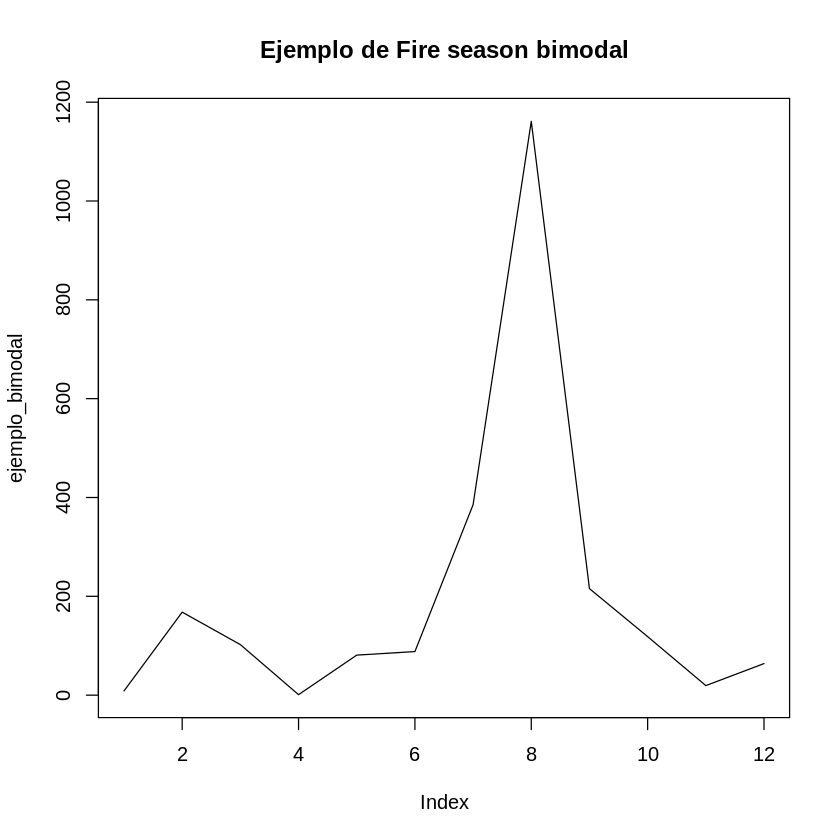

In [67]:
ejemplo_bimodal <- df.seriesTemporales_conCoords[df.seriesTemporales_conCoords$'coord_x' == x & df.seriesTemporales_conCoords$'coord_y' == y ,]
ejemplo_bimodal <- unlist((ejemplo_bimodal[,3:14]))
ejemplo_bimodal
plot(ejemplo_bimodal,type ='l', main= 'Ejemplo de Fire season bimodal')

### Caracterización global de la fire season

#### Seassonal concentration

In [68]:
non_seassonalConcentration <- df.fireSeasson[df.fireSeasson$'SeassonalConcentration' == 0, ]
SeassonalConcentration_low <- df.fireSeasson[df.fireSeasson$'SeassonalConcentration' <0.5 & df.fireSeasson$'SeassonalConcentration' >0, ]
SeassonalConcentration_high <- df.fireSeasson[df.fireSeasson$'SeassonalConcentration' >0.5, ]

cat('Cantidad de series sin concentración estacionaria (igual a 0) = ', nrow(non_seassonalConcentration), '(',nrow(non_seassonalConcentration)/nrow(df.fireSeasson)*100,'%)',
'\nCantidad de series con concentración estacionaria baja (menor que 0) = ',nrow(SeassonalConcentration_low) , '(',nrow(SeassonalConcentration_low)/nrow(df.fireSeasson)*100,'%)',
    '\nCantidad de series con concentración estacionaria alta (mayor que 0) = ',nrow(SeassonalConcentration_high) , '(',nrow(SeassonalConcentration_high)/nrow(df.fireSeasson)*100,'%)')

Cantidad de series sin concentración estacionaria (igual a 0) =  2884 ( 71.20988 %) 
Cantidad de series con concentración estacionaria baja (menor que 0) =  155 ( 3.82716 %) 
Cantidad de series con concentración estacionaria alta (mayor que 0) =  1011 ( 24.96296 %)

Ejemplo de Seassonal concentration high

In [69]:
##escogemos la x de una bimodal
x  <- SeassonalConcentration_high$'coord_x'[1]
##escogemos la y de la misma bimodal
y  <- SeassonalConcentration_high$'coord_y'[1]

X1        X2        X3        X4        X5        X6        X7        X8 
0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.2555429 
       X9       X10       X11       X12 
5.1109190 0.0000000 0.0000000 0.0000000

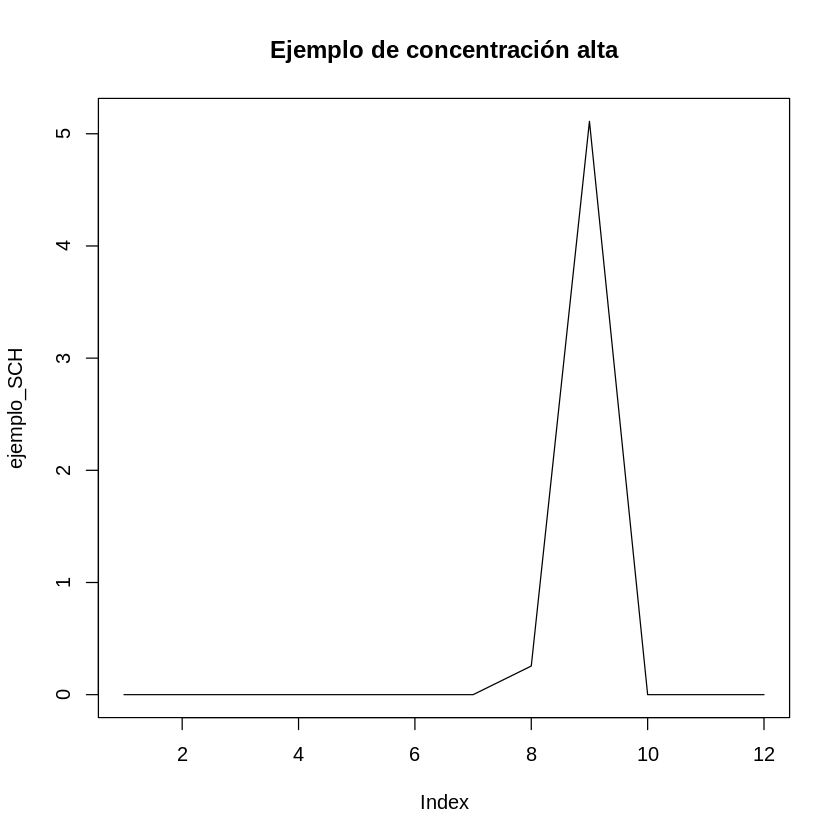

In [70]:
ejemplo_SCH <- df.seriesTemporales_conCoords[df.seriesTemporales_conCoords$'coord_x' == x & df.seriesTemporales_conCoords$'coord_y' == y ,]
ejemplo_SCH <- unlist((ejemplo_SCH[,3:14]))
ejemplo_SCH
plot(ejemplo_SCH,type ='l', main= 'Ejemplo de concentración alta')

Ejemplo de Seassona concentration Low

In [71]:
##escogemos la x de una concentration low
x  <- SeassonalConcentration_low$'coord_x'[1]
##escogemos la y de la misma serie
y  <- SeassonalConcentration_low$'coord_y'[1]

,coord_x,coord_y,FireSeasson,Bimodal,SeassonalConcentration,SeassonalTiming
,<dbl>,<dbl>,<named list>,<lgl>,<dbl>,<dbl>
667,-122,56,"1, 2, 3, 4, 5, 6, 7, 8",FALSE,0.4798222,-1.453355


X1         X2         X3         X4         X5         X6         X7 
 437.85485  209.53608   36.30921 1453.01349 4094.43966  975.43139 4354.27794 
        X8         X9        X10        X11        X12 
2269.52605 1199.11627 1406.02812 1088.62597  207.75887

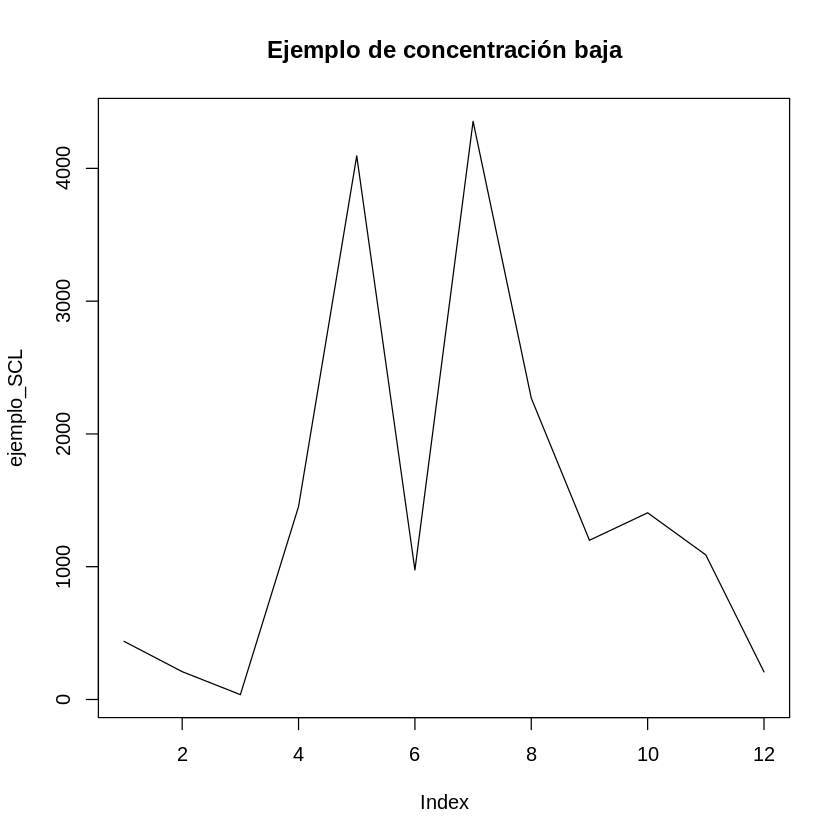

In [72]:
## Como hay muchas series con baja concentración que las coge como una serie de ceros, filtro antes:
#df.fireSeasson[df.seriesTemporales_conCoords$'coord_x' == x & df.seriesTemporales_conCoords$'coord_y' == y ,]
ejemplo_SCL <- df.seriesTemporales_conCoords[df.seriesTemporales_conCoords$'coord_x' == x & df.seriesTemporales_conCoords$'coord_y' == y ,]
ejemplo_SCL <- unlist((ejemplo_SCL[,3:14]))
df.fireSeasson[df.fireSeasson$'coord_x' == x & df.fireSeasson$'coord_y' == y, ]
ejemplo_SCL
plot(ejemplo_SCL,type ='l', main= 'Ejemplo de concentración baja')

#### Seassonal Timming

In [73]:
st_1 <- df.fireSeasson[df.fireSeasson$'SeassonalTiming' > -1 & df.fireSeasson$'SeassonalTiming' < 0, ]
st_2 <- df.fireSeasson[df.fireSeasson$'SeassonalTiming' == 0, ]
st_3 <- df.fireSeasson[df.fireSeasson$'SeassonalTiming' < 1 & df.fireSeasson$'SeassonalTiming' > 0, ]


cat('Cantidad de series con seassonal timing mayor que -1 y menor que 0= ', nrow(st_1), '(',nrow(st_1)/nrow(df.fireSeasson)*100,'%)',
'\nCantidad de series con seassonal timing igual a 0 = ',nrow(st_2) , '(',nrow(st_2)/nrow(df.fireSeasson)*100,'%)',
    '\nCantidad de series con seassonal timing menor que 1 y mayor que 0 = ',nrow(st_3) , '(',nrow(st_3)/nrow(df.fireSeasson)*100,'%)')

Cantidad de series con seassonal timing mayor que -1 y menor que 0=  231 ( 5.703704 %) 
Cantidad de series con seassonal timing igual a 0 =  2884 ( 71.20988 %) 
Cantidad de series con seassonal timing menor que 1 y mayor que 0 =  378 ( 9.333333 %)

,coord_x,coord_y,FireSeasson,Bimodal,SeassonalConcentration,SeassonalTiming
,<dbl>,<dbl>,<named list>,<lgl>,<dbl>,<dbl>
171,-166,52,5,FALSE,1,-0.5235988


X1       X2       X3       X4       X5       X6       X7       X8 
0.000000 0.000000 0.000000 0.000000 2.044367 0.000000 0.000000 0.000000 
      X9      X10      X11      X12 
0.000000 0.000000 0.000000 0.000000

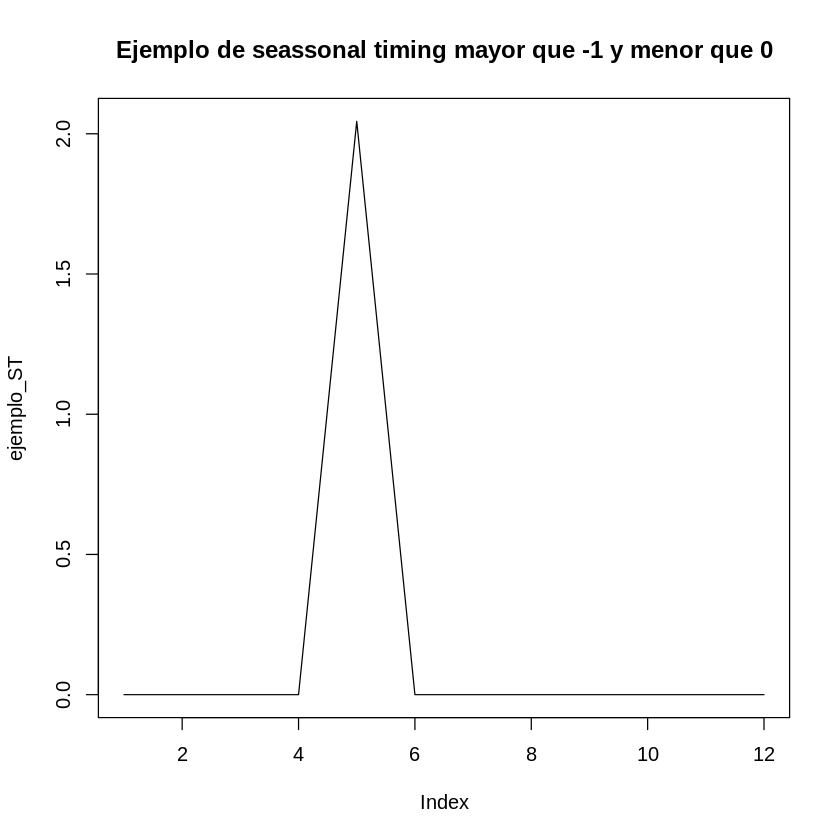

In [74]:
##escogemos la x 
x  <- st_1$'coord_x'[1]
##escogemos la y 
y  <- st_1$'coord_y'[1]
ejemplo_ST <- df.seriesTemporales_conCoords[df.seriesTemporales_conCoords$'coord_x' == x & df.seriesTemporales_conCoords$'coord_y' == y ,]
ejemplo_ST <- unlist((ejemplo_ST[,3:14]))
df.fireSeasson[df.fireSeasson$'coord_x' == x & df.fireSeasson$'coord_y' == y, ]
ejemplo_ST
plot(ejemplo_ST,type ='l', main= 'Ejemplo de seassonal timing mayor que -1 y menor que 0')

,coord_x,coord_y,FireSeasson,Bimodal,SeassonalConcentration,SeassonalTiming
,<dbl>,<dbl>,<named list>,<lgl>,<dbl>,<dbl>
39,-178,64,8,FALSE,0.9939056,0.5475563


X1        X2        X3        X4        X5        X6        X7        X8 
0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.2555429 
       X9       X10       X11       X12 
5.1109190 0.0000000 0.0000000 0.0000000

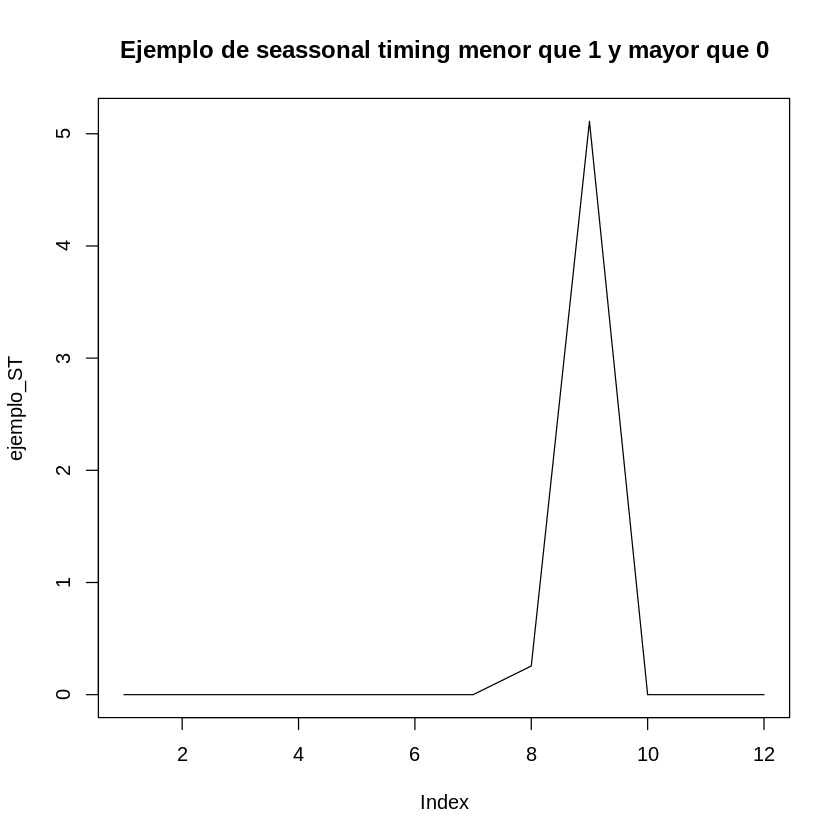

In [75]:
##escogemos la x 
x  <- st_3$'coord_x'[1]
##escogemos la y 
y  <- st_3$'coord_y'[1]
ejemplo_ST <- df.seriesTemporales_conCoords[df.seriesTemporales_conCoords$'coord_x' == x & df.seriesTemporales_conCoords$'coord_y' == y ,]
ejemplo_ST <- unlist((ejemplo_ST[,3:14]))
df.fireSeasson[df.fireSeasson$'coord_x' == x & df.fireSeasson$'coord_y' == y, ]
ejemplo_ST
plot(ejemplo_ST,type ='l', main= 'Ejemplo de seassonal timing menor que 1 y mayor que 0')

In [76]:
#Para estudiar bimodales dificiles plantear cambio entre meses. Si cambia mucho de un mes a otro y luego hay otro cambio grande podemos categorizar como fire seasson
#Plantear con funciones de densidad para determinar bien qué fire seasson hay. 

#Lo primero es determinar si los máximos no son consecutivos. Primer tengo un filtro en el que los ceros me parten las fire seassons. Ahora de las unimodales que me quedan tengo que plantear si entre los dos máximos hay suficiente cambio como para considerar que son dos fire seassons
#Podemos coger los dos máximos, comparar con los puntos anteriores y los puntos posteriores (Función diff) y plantear si hay dos negativos y dos positivos (e incluir un umbral), 
#es decir, esto implica el usar la derivada de la fire seasson. Para ello usamos diff y vemos los cambios de signo: Si hay tres cambios de signo, entonces es bimodal. 
#El punto es si estos cambios de signos tienen un cambio de cantidad lo suficientemente grande como para considerar que hay una segunda fire seasson
#Podemos establecer cuánto cambio el mínimo con respecto al máximo y el mínimo con respecto al máximo en procentaje. Y así estabecemos un umbral.

## Visualizaciones

In [77]:
vector_bimodales <- c()
for (row in 1:nrow(df.fireSeasson)){
    if (is.na(df.fireSeasson[row,]$FireSeasson)){
        vector_bimodales <- c(vector_bimodales, 0)
    }else{
        if (df.fireSeasson[row,]$Bimodal == FALSE){
            vector_bimodales <- c(vector_bimodales, 1)
        }else{
            vector_bimodales <- c(vector_bimodales, 2)
        }
    }
}

0 = No Fire Seasson 
1 = Unimodal 
2 = Bimodal

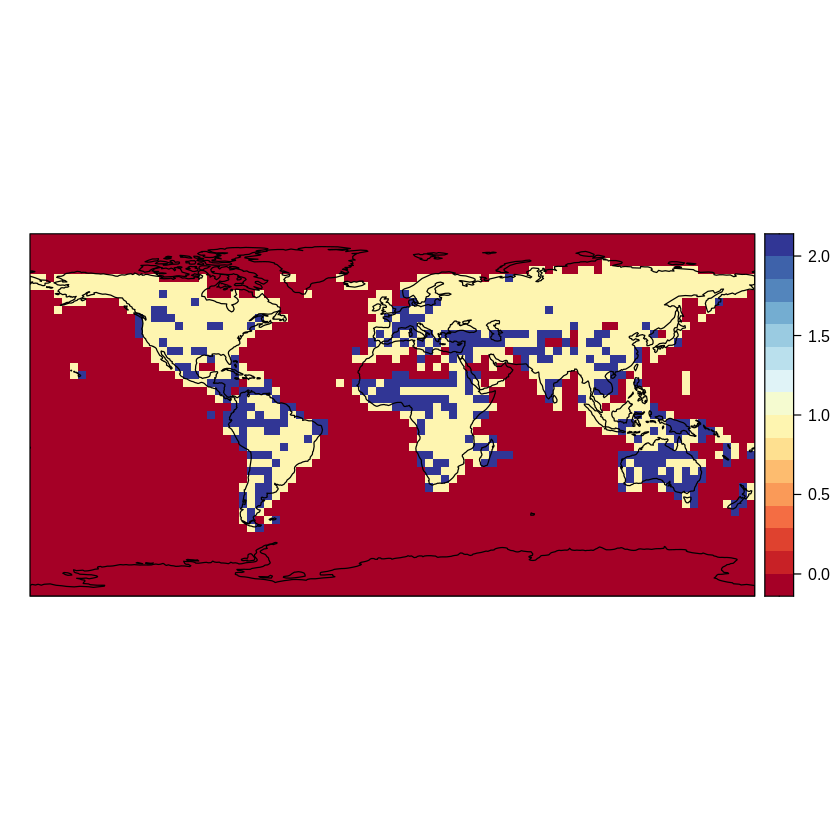

In [78]:
bimodalesOrNot_clim <- quantity2clim(quantity = vector_bimodales, what = 'bimodales', ref.grid = grid, backperm = NULL)
spatialPlot(bimodalesOrNot_clim, backdrop.theme = 'coastline')
cat('0 = No Fire Seasson','\n1 = Unimodal', '\n2 = Bimodal')

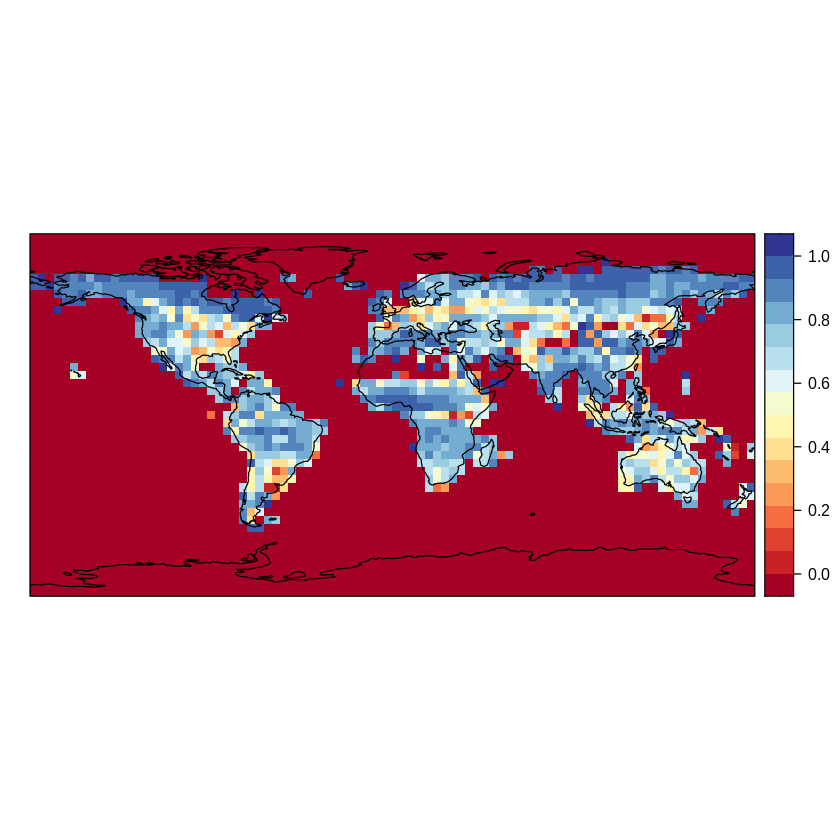

In [79]:
SeassonalConcentration_viz <- quantity2clim(quantity = df.fireSeasson$'SeassonalConcentration', what = 'SeassonalConcentration', ref.grid = grid, backperm = NULL)
spatialPlot(SeassonalConcentration_viz, backdrop.theme = 'coastline')

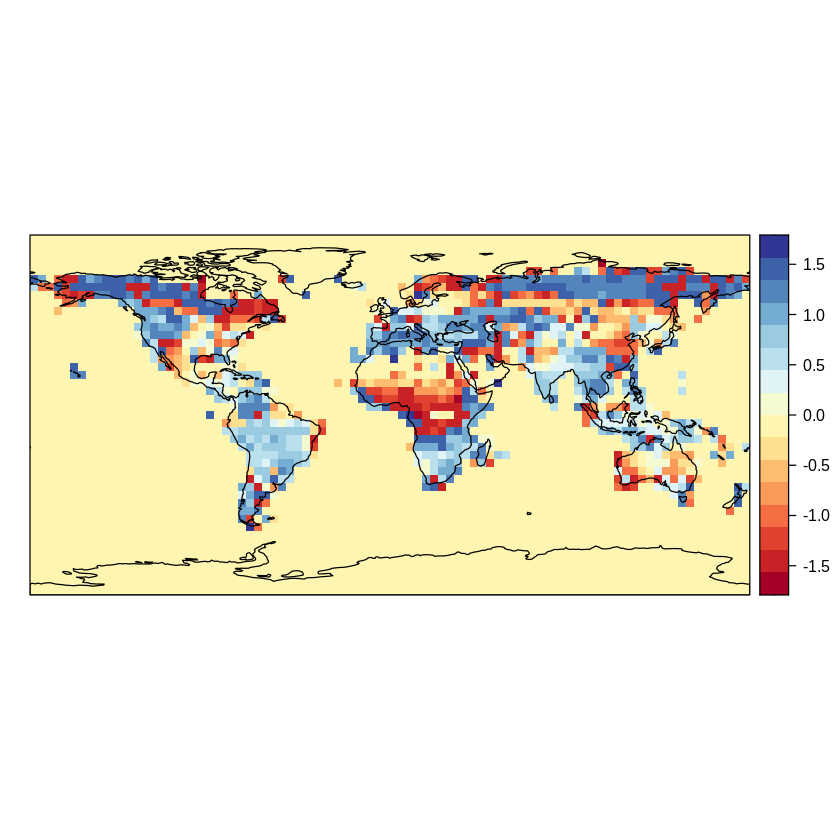

In [80]:
SeassonalTiming_viz <- quantity2clim(quantity = df.fireSeasson$'SeassonalTiming', what = 'bimodales', ref.grid = grid, backperm = NULL)
spatialPlot(SeassonalTiming_viz, backdrop.theme = 'coastline')

In [81]:
##Hacerlo con circolors (-1.5, 1.5)

### Correlaciones

In [82]:
seassonalTiming <- df.fireSeasson$'SeassonalTiming'
seassonalConcentration <- df.fireSeasson$'SeassonalConcentration'
bimodal <- df.fireSeasson$'Bimodal'
matriz_cor = func.matriz_covarianzas(list(bimodal, seassonalConcentration, seassonalTiming), c('Bimodal', 'SeassonalConcentration', 'SeassonalTiming'),cor)

matriz_cor

,Bimodal,SeassonalConcentration,SeassonalTiming
Bimodal,1.00000000,0.4025150,0.03813261
SeassonalConcentration,0.40251498,1.0000000,0.19462140
SeassonalTiming,0.03813261,0.1946214,1.00000000


### Data frame final

In [96]:
df_fba <- func.ToDataFrame(grid = grid_fba, coordX = grid_fba$xyCoords$x, coordY = grid_fba$xyCoords$y, func = mean)
vector_fba <- df_fba[,1]

100.00% de func.ToDataFrame completado

In [97]:
main_fire_season_start <- c()
main_fire_season_end <- c()
secondary_fire_season_start <- c()
secondary_fire_season_end <- c()
FireSeassonOrNot = c()
fireSeassonLength <- c()
for (i in 1:nrow(df.fireSeasson)){
    if (is.na(df.fireSeasson[i, ]$'FireSeasson')){
        main_fire_season_start <- c(main_fire_season_start, NA)
        secondary_fire_season_start <- c(secondary_fire_season_start, NA)
        main_fire_season_end <- c(main_fire_season_end, NA)
        secondary_fire_season_end <- c(secondary_fire_season_end, NA)
        FireSeassonOrNot = c(FireSeassonOrNot, 0 )
        fireSeassonLength <- c(fireSeassonLength, NA)
    }else{
        main_sec_FS <- func.main_fireSeasson(unlist(df.fireSeasson[i, ]$'FireSeasson'))
        main_fire_season_start <- c(main_fire_season_start, main_sec_FS$main[1])
        secondary_fire_season_start <- c(secondary_fire_season_start, main_sec_FS$secondary[1])
        main_fire_season_end <- c(main_fire_season_end, main_sec_FS$main[length(main_sec_FS$main)])
        secondary_fire_season_end <- c(secondary_fire_season_end, main_sec_FS$secondary[length(main_sec_FS$secondary)])
        FireSeassonOrNot = c(FireSeassonOrNot, 1 )
        fireSeassonLength <- c(fireSeassonLength, length(unlist(df.fireSeasson[i, ]$'FireSeasson')))
    }
}

In [98]:
df <- data.frame('coord_x' = df.fireSeasson$'coord_x', 'coord_y' = df.fireSeasson$'coord_y', FireSeassonOrNot, main_fire_season_start,main_fire_season_end, secondary_fire_season_start, secondary_fire_season_end, fireSeassonLength, 'SeassonalConcentration'=df.fireSeasson$'SeassonalConcentration', 'SeassonalTiming'=df.fireSeasson$'SeassonalTiming','FBA'=vector_fba)
#df$FireSeassonOrNot <- as.integer(df$FireSeassonOrNot)
#save(df, file = '../3.Datos generados/dataframes raster/df_raster')

In [99]:
df[df$'FBA' != 0 & !is.nan(df$'FBA') ,][1:10,]
##SAber distinguir si no hay fire seasson porque es mar o si no hay fire seasson porque es tierra ==> Lo podemos filtrar con la fba correspondiente (mascara)
#Incluir como otra variable del data frame el fba

,coord_x,coord_y,FireSeassonOrNot,main_fire_season_start,main_fire_season_end,secondary_fire_season_start,secondary_fire_season_end,fireSeassonLength,SeassonalConcentration,SeassonalTiming,FBA
,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
36,-178,52,0,NA,NA,NA,NA,NA,0.0000000,0.0000000,2.035458e-03
39,-178,64,1,8,8,NA,NA,1,0.9939056,0.5475563,7.510775e-02
40,-178,68,1,6,6,NA,NA,1,0.9780148,1.4715809,5.283222e-01
41,-178,72,0,NA,NA,NA,NA,NA,0.0000000,0.0000000,7.072638e-02
81,-174,52,0,NA,NA,NA,NA,NA,0.0000000,0.0000000,1.639105e-03
83,-174,60,0,NA,NA,NA,NA,NA,0.0000000,0.0000000,5.277024e-04
84,-174,64,1,6,7,NA,NA,2,0.9864471,-1.0857997,2.467580e-01
85,-174,68,1,8,8,NA,NA,1,1.0000000,1.0471976,2.694328e-01
86,-174,72,0,NA,NA,NA,NA,NA,0.0000000,0.0000000,6.269093e-06


In [100]:
df_previo <- get(load('../3.Datos generados/dataframes/df_grid_4.Rdata'))

In [29]:
library('raster')

Loading required package: sp



In [30]:
spatial_df <-- df[c("coord_x","coord_y","FireSeassonOrNot")]

In [31]:
dfr  <- rasterFromXYZ(df)

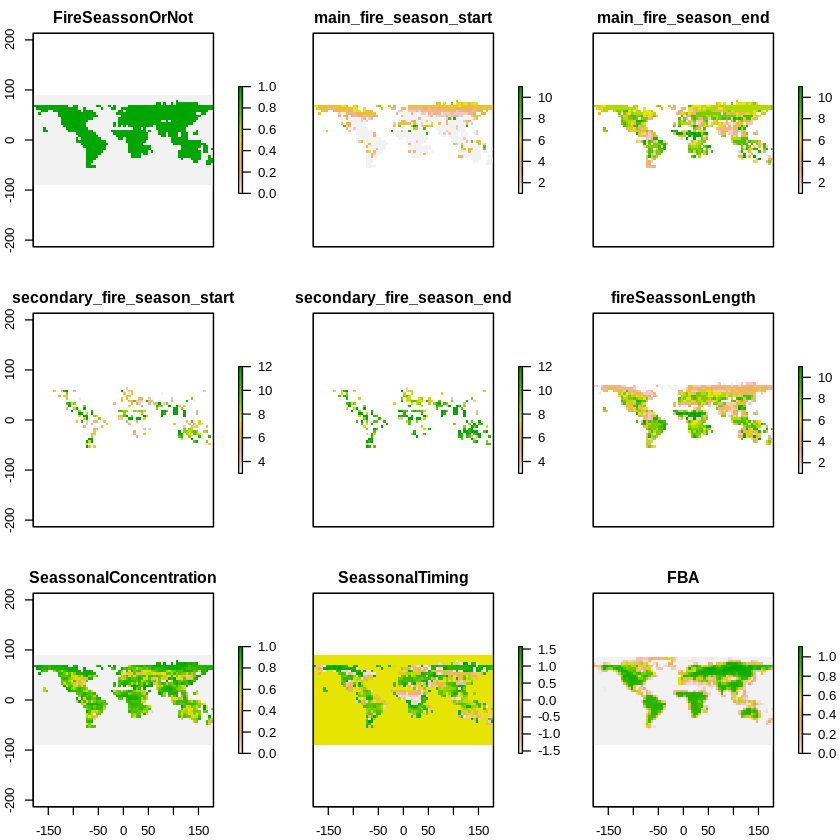

In [33]:
plot(dfr)

In [34]:
nombre_variable <- deparse(substitute(ba.mergeGrid5))
ruta <- '../3.Datos generados/dataframes raster/df_raster_'
ruta_archivo <- paste0(ruta,nombre_variable,'.tif')
writeRaster(dfr, filename = ruta_archivo, format = "GTiff")

Warning message in .gd_SetProject(object, ...):
“NOT UPDATED FOR PROJ >= 6”
